# Analysis of the Most Profitable AirBnb Listing in Paris, France

In this document, we will explore the key characteristics that a succesful Airbnb listing in Paris should possess in order to achieve a good rating and maximize the most host's income.

## 1. Loading the Data

In [1]:
# Packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
# Styles for Matplotlib
plt.style.use('ggplot')

In [2]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [3]:
# Loading the listings CSV file as dataframe
listings_df = pd.read_csv("./data/listings.csv.gz")

In [4]:
# Loading the Arrondissements CSV file as dataframe
arrodissements_df = pd.read_csv("./data/arrondissements.csv",  sep=';')

## 2. Understanding the data

In [5]:
# Listing Dataset dimmensions
print("Dataset dimmensions:", listings_df.shape)
print("Number of Acommodations:", listings_df.shape[0])
print("Number of Attributes:", listings_df.shape[1])

Dataset dimmensions: (61706, 75)
Number of Acommodations: 61706
Number of Attributes: 75


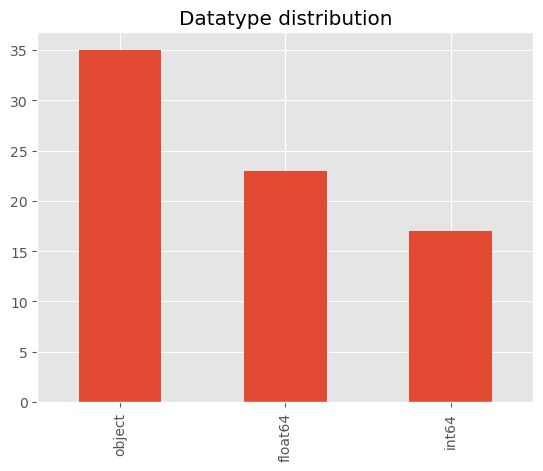

In [6]:
# Showing column types
listings_df.dtypes.value_counts().plot.bar()
plt.title("Datatype distribution")
plt.show()

### Top 5 Attributes

Paris is one of the most touristic places on the world because it has many must-see attractions, such as the Eiffel tower, Arc of Triomphe, Palace of Versailles, and more. **Location(Neighborhood)** is a key factor for tourists, as these attractions are often quite distant from each other. Exploring a new city on foot is fun, but too much walking could be a deterrent. Naturally, waking up to a view of the Eiffel Tower is a dream for many. The question is, how much are tourists willing to pay for such an experience?

Now, when navigating through the AirBnb's website main page, we encounter an initial filter for the **type of room**, an hotel penthouse room is not always the best option. Furthermore we can notice a strong enphasis on **price** and **rating** in the properties preview. This emphasis suggests that these attributes are more important for users, making it essential to consider them in our analysis.


Finally, when people are away from home, they don't have a place to cook their meals or a washing machine to keep clean their clothes, or not even a TV to enjoy their favorite tv show. But do these **amenities** hold significant important for tourists when travelling in Paris? Perhaps they prefer tasting local cuisine at a French restaurant or have packed enough clothes so they don't need to wash them. We will analyze which amenitis are essensial for an AirBnb listing.

In [7]:
# Showing these top 5 attributes for a sample of 10 listings
top_5_attributes = ["neighbourhood_cleansed", "amenities", "price", "room_type", "review_scores_rating"]
listings_df[top_5_attributes].sample(5)

,neighbourhood_cleansed,amenities,price,room_type,review_scores_rating
411,Bourse,"[""TV with standard cable"", ""Iron"", ""Hair dryer...",$55.00,Private room,4.50
5074,Passy,"[""TV with standard cable"", ""Essentials"", ""Smok...",$50.00,Entire home/apt,NaN
54583,Vaugirard,"[""Smoke alarm"", ""Iron"", ""Hair dryer"", ""Dedicat...",$45.00,Private room,NaN
22019,Entrepôt,"[""Essentials"", ""HDTV with Netflix, DVD player""...",$300.00,Entire home/apt,4.88
47582,Ménilmontant,"[""Essentials"", ""Smoke alarm"", ""Washer"", ""Kitch...",$65.00,Entire home/apt,NaN


### Neighbourhood Univariate analysis

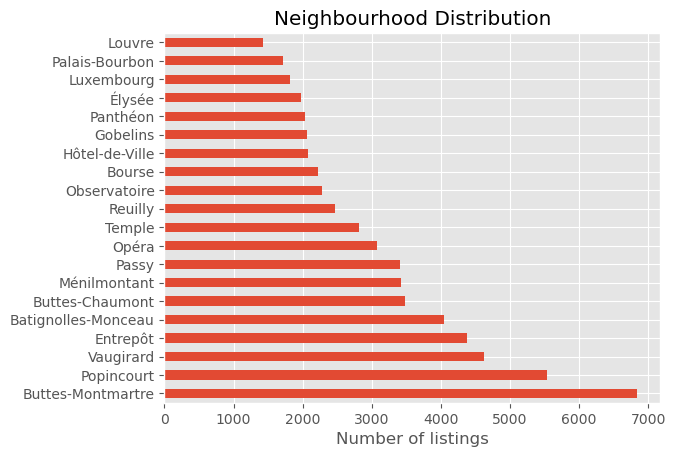

In [8]:
# Neighbourhood distribution
listings_df["neighbourhood_cleansed"].value_counts().plot.barh()
plt.title("Neighbourhood Distribution")
plt.xlabel("Number of listings")
plt.show()

Paris is divided into 20 neighborhoods, known as arrondissements (a French term similar to districts). Interestingly, these districts are more commonly identified by their unique arrondissement numbers rather than their names. For instance, the neighborhood of Louvre is referred to as the 1st arrondissement. This is a problem because in several web sites for  tourists and even in google maps they are going to be listed only by its arrondissement number. That's why to complement the initial dataset we are going to add the arrondissements numbers provided by the dataset taken from [French Open-data website](https://www.data.gouv.fr/es/datasets/arrondissements-1/).

In [9]:
# Showing a sample of the Arrondissement dataset
arrodissements_df.sample(5)

,Identifiant séquentiel de l’arrondissement,Numéro d’arrondissement,Numéro d’arrondissement INSEE,Nom de l’arrondissement,Nom officiel de l’arrondissement,N_SQ_CO,Surface,Périmètre,Geometry X Y,Geometry
8,750000018,18,75118,18ème Ardt,Buttes-Montmartre,750001537,5.996051e+06,9916.464176,"48.892569268005786, 2.3481605195620405","{""coordinates"": [[[2.365803615296344, 48.88554..."
14,750000016,16,75116,16ème Ardt,Passy,750001537,1.637254e+07,17416.109657,"48.86039210541585, 2.2619707883645415","{""coordinates"": [[[2.2742681959573754, 48.8783..."
10,750000012,12,75112,12ème Ardt,Reuilly,750001537,1.631478e+07,24089.666298,"48.83497438148033, 2.4213249007846733","{""coordinates"": [[[2.4138796243006073, 48.8335..."
0,750000003,3,75103,3ème Ardt,Temple,750001537,1.170883e+06,4519.263648,"48.862872380016924, 2.360000985897691","{""coordinates"": [[[2.3638280960629254, 48.8675..."
12,750000013,13,75113,13ème Ardt,Gobelins,750001537,7.149311e+06,11546.546526,"48.82838803174471, 2.362272440420904","{""coordinates"": [[[2.3749133792570913, 48.8380..."


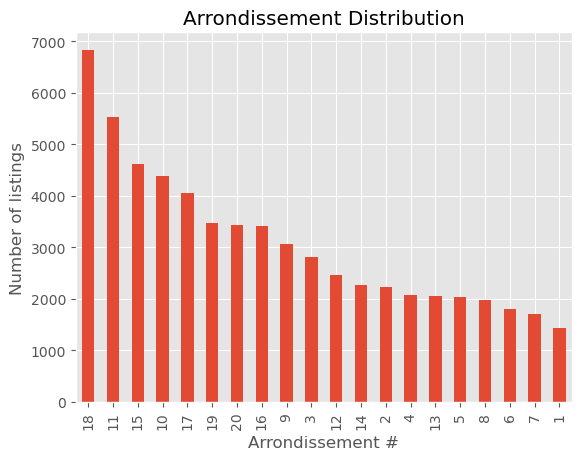

In [10]:
# Adding arrondissement number to listings dataset
arrondissement_dict = arrodissements_df.set_index('Nom officiel de l’arrondissement')['Numéro d’arrondissement'].to_dict()
listings_df["arrondissement_number"] = listings_df["neighbourhood_cleansed"].map(arrondissement_dict)

# Arrondissement distributinon
listings_df["arrondissement_number"].value_counts().plot.bar()
plt.title("Arrondissement Distribution")
plt.xlabel("Arrondissement #")
plt.ylabel("Number of listings")
plt.show()

Despite there isn't major touristic places in the 18th arrondissement (Buttes-Montmartre) and 11th arroondissement (Popincourt) we can find the more listings there. On the other hand, the 7th arrondissement (Palais Bourbon), where the Eiffel tower is located, presents the second lowest concentration of listings, this could be explained because the 7th arrondissement is not a densely urban district. Additionally, another good view of the Eiffel tower can be found in the 15th arrondissement (Vaugirard), which is next to the tower and offers direct sightlines.

### Price Univariate Analysis

In [11]:
# We need to transform the price attribute from object to float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [12]:
# Basic statistics for price
listings_df['price_float'].describe()

count    61706.000000
mean       198.019804
std        537.160796
min          0.000000
25%         78.000000
50%        120.000000
75%        200.000000
max      63594.000000
Name: price_float, dtype: float64

Firstly, it's worth noting that there are a few listings with a price of 0, Does this mean this listings are being rented for free?  Using the **listing_url** atributte we can confirm that these listings are not longer available in the AIrBnb website, probably they were deleted by the host or were never even published. Consequently, they are not longer a good source of information. Consequently, they do not provide valuable information for our analysis, and we will exclude them from consideration.

In [13]:
# Number of listings with price 0
free_listings_df = listings_df.loc[listings_df["price_float"] == 0]
print("Number of listings with price 0:", len(free_listings_df))

# Checking if these listings can be found on the AirBnb web site
con = 0
for index, listing in free_listings_df.iterrows():
    response = requests.get(listing["listing_url"])
    if response.status_code != 200:
        con += 1

print("Listings not found in the AirBnb web site:", con)

Number of listings with price 0: 26
Listings not found in the AirBnb web site: 26


Additionally, there are listings with exceptionally high prices, these are outliers that affects our charts, so we are not going to take them into account for this analisys neither.

In [14]:
# Outlier Threshold
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1
outliers_max_factor = 1.5

In [15]:
# Filtering listings DF for the analysis
listings_filtered_df = listings_df.loc[(0 < listings_df["price_float"]) & (listings_df["price_float"] <= (q3 + outliers_max_factor * iqr))]

listings_filtered_df['price_float'].describe()

count    56130.000000
mean       132.817549
std         79.427671
min          8.000000
25%         74.000000
50%        110.000000
75%        174.000000
max        383.000000
Name: price_float, dtype: float64

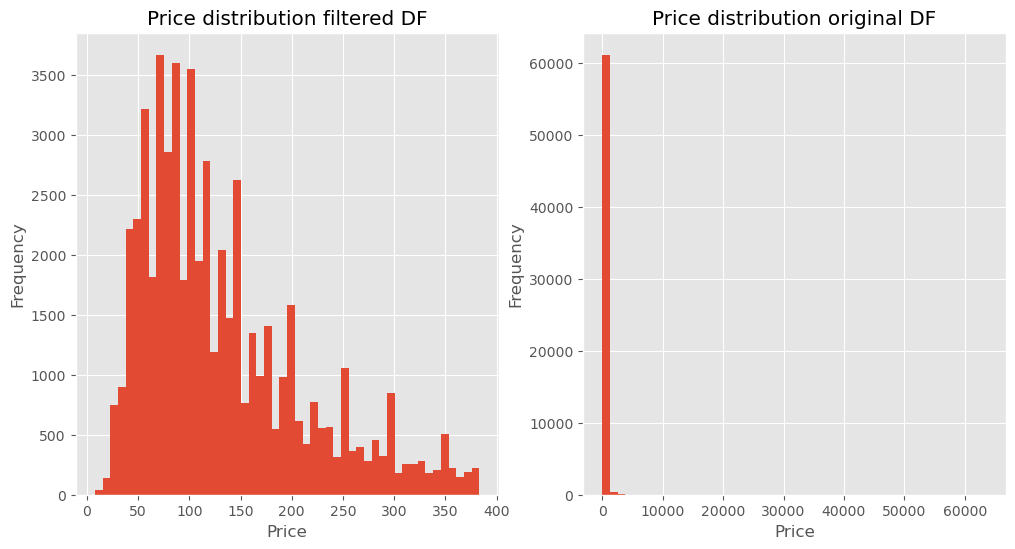

In [16]:
# Price distribution Original DF vs Filtered DF
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
listings_filtered_df["price_float"].plot.hist(bins=50, ax=axes[0])
listings_df["price_float"].plot.hist(bins=50, ax=axes[1])
axes[0].set_title("Price distribution filtered DF")
axes[0].set_xlabel("Price")
axes[1].set_title("Price distribution original DF")
axes[1].set_xlabel("Price")
plt.show()

Finally, using the filtered dataframe we can see most of the listings have prices arround \\$50 and \\$150 per night, an expected value for one of the most expensive cities in Europe

### Room type Univariate analysis

In [17]:
# Showing unique values for Room type
listings_filtered_df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

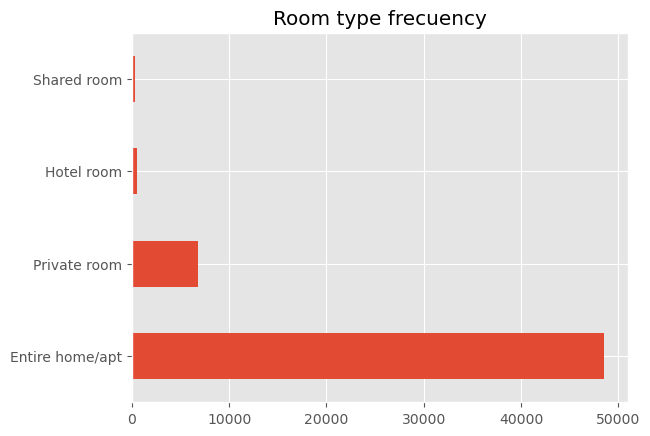

In [18]:
# Room type frecuency
listings_filtered_df['room_type'].value_counts().plot.barh()
plt.title("Room type frecuency")
plt.show()

As expected, the majority listings on AirBb are apartments because this is the most important platform in the apartment rental market. Shared rooms and hotel rooms are usually associated with other websites, such as HostelWorld and Booking.com respectively

### Amenities Univariate Analysis

One of the most important characteristics for an AirBnb listing is the availability of various amenities for guests to enjoy. If you will invest and turn a property into an AirBnb listing, you must be well-informed about what items to acquire or include to make it more attrative to tourists

In [19]:
# Checking coincidences in amenities that the listings have
amenities_list = listings_filtered_df['amenities'].apply(eval).explode()
amenities_list.value_counts()

Kitchen                                                       52853
Wifi                                                          50208
Essentials                                                    48864
Smoke alarm                                                   41667
Heating                                                       40053
                                                              ...  
BRANDT refrigerator                                               1
Vonshef  stainless steel oven                                     1
Elecrtrolux refrigerator                                          1
77" TV with Disney+, Amazon Prime Video, Apple TV, Netflix        1
Zug oven                                                          1
Name: amenities, Length: 5947, dtype: int64

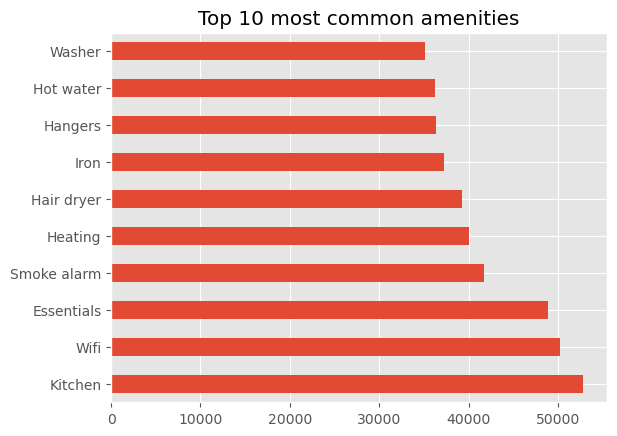

In [20]:
# Top 10 most common amenities in listings
amenities_list.value_counts()[0:10].plot.barh()
plt.title("Top 10 most common amenities")
plt.show()

In [21]:
# Number of unique amenities
len(amenities_list.value_counts().loc[lambda x : x == 1])

3781

Most listings are apartments, it is expected that the most common characteristic for an Airbnb is to have Kitchen. Besides tourist are usually from other countries, so they don't have internet and need Wifi service.

### Rating Univariate Analysis

In [22]:
# Number of listings without a rating
listings_filtered_df['review_scores_rating'].isna().sum()

10751

In [23]:
# Basic data from rating
listings_filtered_df['review_scores_rating'].describe()

count    45379.000000
mean         4.618693
std          0.655271
min          0.000000
25%          4.500000
50%          4.790000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

<Axes: >

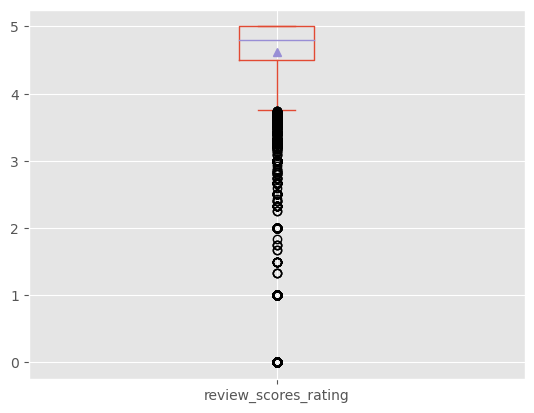

In [24]:
# Boxplot for ratings
listings_filtered_df['review_scores_rating'].plot.box(showmeans=True)

Majority of listings have very positive reviews, 5o% of the them have a rating greater than 4.5.

# 3. Strategy

In order to know what is the best property to invest in. We would have to know monthly revenue for each listing, this could be calculated by looking at the french taxes for properties, maintenance and managment costs, percentage of money taken by AirBnb for each rental and number of reservations made in a month. Sadly, this information is not provided by the listings dataset. We know the price per night and how many reviews got a listing each month, but not all guests make reviews, so we can't assume this is the same number of reservations. We can also know how many days an AirBnb listing is unavailable in the next month, but being unavaible does not necesarily mean these are days booked by a guest, so we can't calculate monthly income. 

Nevertheless, we are going to focus our efforts on finding the most attractive property possibly for a guest in Paris, in order to optimize the number of reservations per month and maximize returns for an investor. To succesfully achieve  this, we will answer three key questions:

1. **What is the best location possible?** - We will determine the best-rated arrondissement based on its location.
2. **What should be an appropiate price?**:  Picking a reasonable price for the arrondissement could increase the number of reservations.
3. **What characteristics should it have?**:  We will ensure that the property is comfortable and well-equipped to maintain positive guest reviews, as this can significantly impact a guest's decision to make a reservation."

# 4. Development

### What is the best location possible?

Paris is not a really large city in terms of area and most of its touristic places are spread arround the city. Consequently, all arrondissement have good reviews based on their locations, with an average rating exceeding 4.5. Nevertheless, some districts achieve an average rating that approaches a perfect 5.0.

The highest rated arrondissement by location is the 4th. This beautiful district next to Seine River and Notre Dame Cathedral. It is also conveniently close to iconic landmarks such as the Pantheon and to Louvre Museum.

The second best in terms of location is the 7th arrondissement. As mentioned previously, it houses the Eiffel Tower, but it is also where "the Champ de Mars" is located, a charming green space perfect for romantic picnics.

Finally, the third best is the 1st arrondissement, located at the heart of Paris, connecting 4th and 7th arrondissements, to have the best of both worlds.

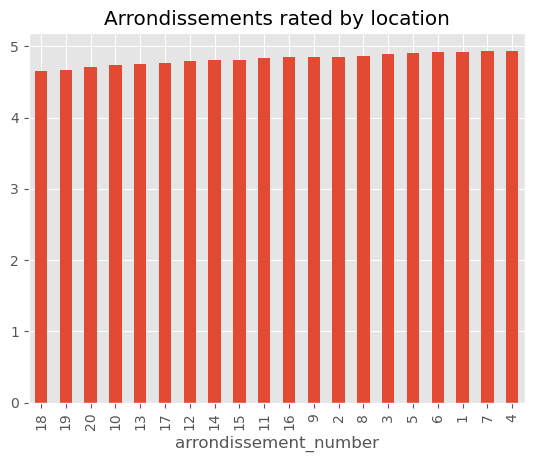

In [25]:
# Best rated arrondissement by its location
listings_filtered_df.groupby('arrondissement_number')['review_scores_location'].mean().sort_values().plot.bar()
plt.title("Arrondissements rated by location")
plt.show()

After some research, we notice that the AirBnb website doesn't show the rating number for properties with ratings below 3.0. This policy aims to provide more appeling browsing experience for users. It's evident that arrondissemenths like 18th, 17th and 11th, located on the outskirts of Paris, tend to ahve more listings with ratings below this threshold. Consequently, reting a listing in one of these districts might be less attractive for tourits.

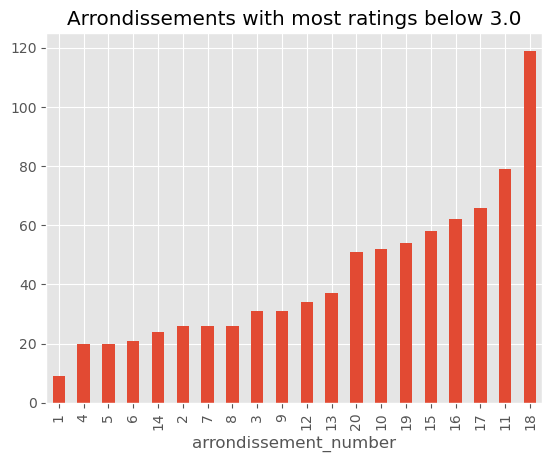

In [26]:
# Bad arrondissements based on hidden ratings
listings_filtered_df.loc[listings_df["review_scores_rating"]<3].groupby('arrondissement_number').size().sort_values().plot.bar()
plt.title("Arrondissements with most ratings below 3.0")
plt.show()

Nevertheless, is there a significant difference between what we consider a 'good' and a 'bad' district? We will compare 4th arrondissement and 18th arrondissement in terms of ratings and price.

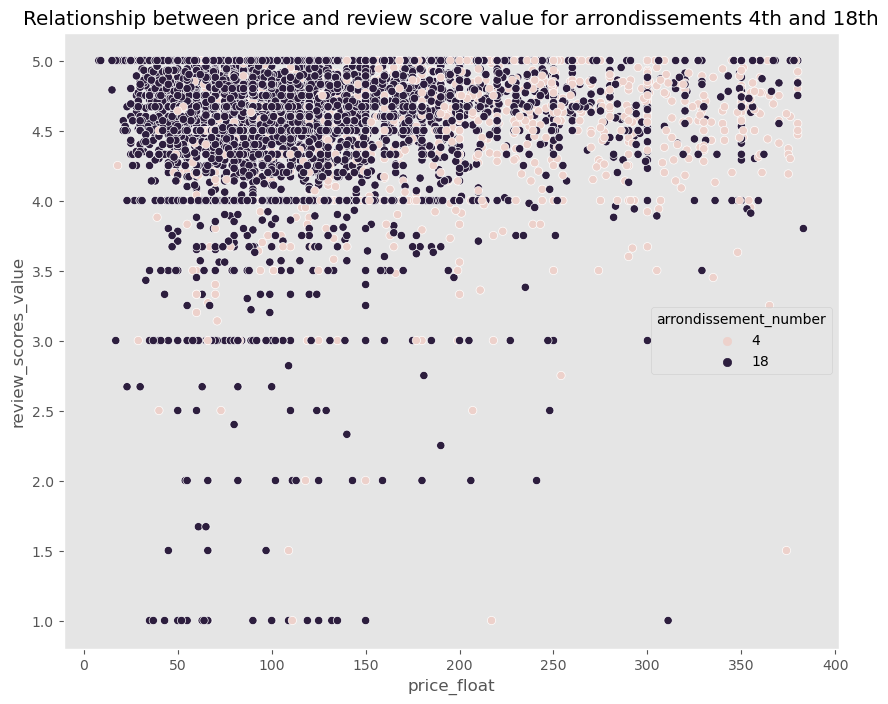

In [27]:
# Comparing 'best' and 'worst' arrondissement
plt.figure(figsize=(10, 8))
arrondissements_filter = [4,18]
arrondissements_compared_df = listings_filtered_df.loc[listings_filtered_df['arrondissement_number'].isin(arrondissements_filter)]
sns.scatterplot(x='price_float', y='review_scores_value', data=arrondissements_compared_df, hue='arrondissement_number')
plt.title("Relationship between price and review score value for arrondissements 4th and 18th")
plt.grid()
plt.show()

We can see listings in 18th arrondissement tend to have lower prices than listings in 4th arrondissement. Besides, despite of arrondissement 18th having more listings, there is clearly less probably to have a bad rating for a listing in 4th arrondissement.

In conclusion, there is a significant difference between getting a property in arrondissements classified as 'good' (4th, 7th and 1th) because they not only rank among the best rated arrondissements by location but also have fewer listings with hidden reviews on the AirBnb website. This makes them highly recommended options for potentials investors.

In [28]:
# Selecting best arrondissement
best_arrondissements = [4, 7 ,1]
best_arrondissements_listings_df = listings_filtered_df.loc[listings_filtered_df['arrondissement_number'].isin(best_arrondissements)]

### What should be an appropriate price?

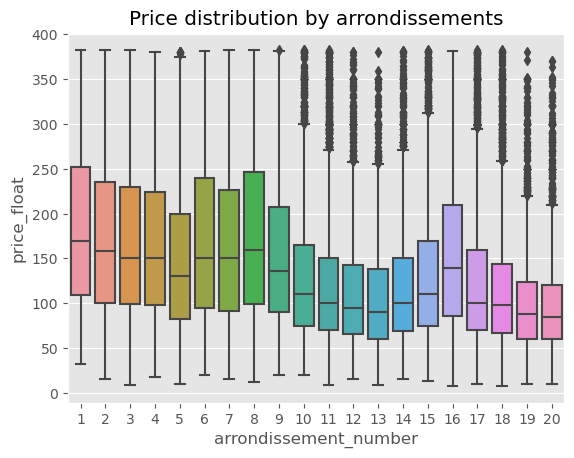

In [29]:
# Boxplot for price by arrondissement number
sns.boxplot(data=listings_filtered_df, x='arrondissement_number', y='price_float')
plt.title("Price distribution by arrondissements")
plt.show()

There is a clear pattern between price and the arrondissement number. The arrondissements with lower numbers tend to have the listings most expensive to rent and also the less amount of outliers with big prices. This can be explained thanks to a Paris Map, if we take a look arround, we can notice it looks like a snail shell, having in the center the 1st arroindissement, and the other ones rolling up arround, from the 2nd until 20th, making the arrondissements with bigger numbers to be located on the outskirts of Paris.

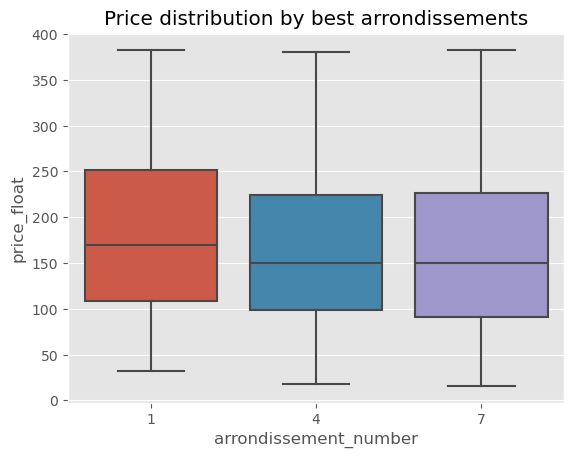

In [30]:
# Boxplot for price by arrondissement number
sns.boxplot(data=best_arrondissements_listings_df, x='arrondissement_number', y='price_float')
plt.title("Price distribution by best arrondissements")
plt.show()

Analysing only our choise for the best arroindissements, we obverve that these districts are also great not only in terms of location but also in pricing. An investor could assign a high value per night without being consider an outlier, allowing for a higher income with fewer reservations. Additionally, these three districts have similar price distributions, with the 1st arrondissement having bigger prices. 

We recommend setting the listing price between \\$100 and \\$300 per night to maintain a competitive and attractive price within these districts. On the other hand, this could be expensive for some tourists, we must check if it affects the ratings the listing is going to receive, potentially making this counterproductive   

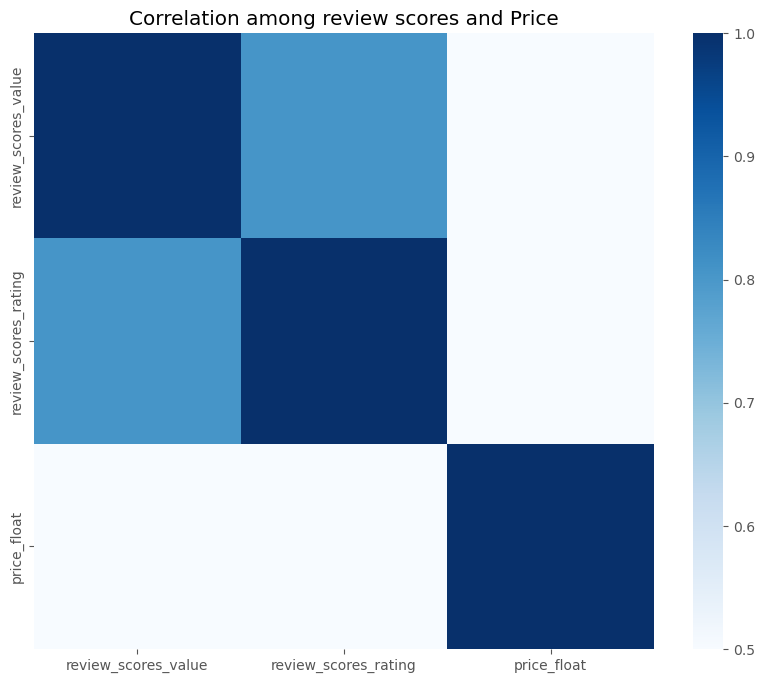

In [31]:
# Plotting correlation heatmap among review scores and price float
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_filtered_df[["review_scores_value", "review_scores_rating", "price_float"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores and Price")
plt.show()

The review scores for value greatly affects the general review rating of the property. Fortunately these ratings are not correlated with the price, suggesting that having high prices or low prices doesn't significantly impact the rating of the listing. If a property is worthy its price, people are going to be willing to paying it. 

### What characteristics should it have?

Now that we have defined the best arrondissemets and optimal price range for new listings in Paris, the next crucial question is: What characteristics should this property possess to make it more attractive for tourists and get more reservations?

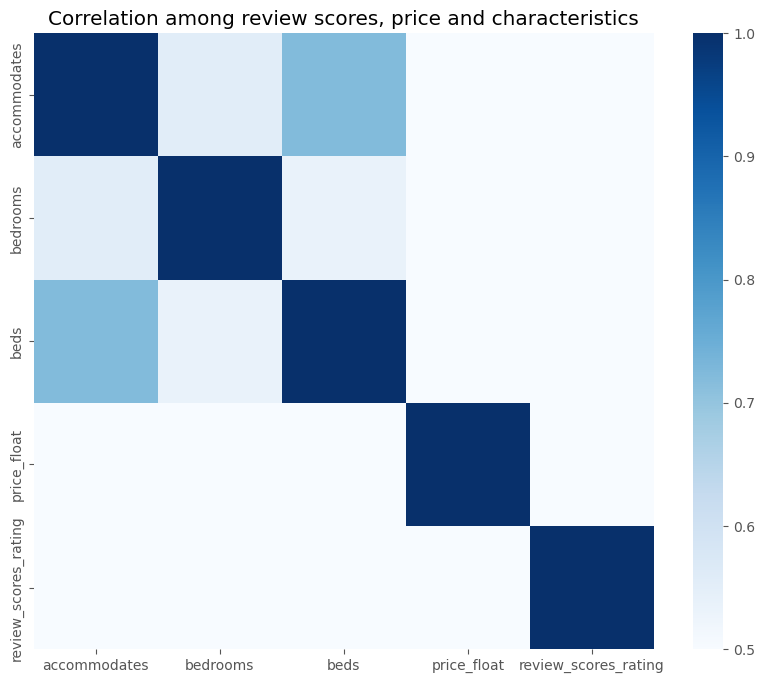

In [32]:
# Plotting correlation among listing characteristics, review scores and price
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_filtered_df[["accommodates", "bedrooms", "beds", "price_float", "review_scores_rating"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores, price and characteristics")
plt.show()

Price and ratings are not correlated significantly with number of beds, bedrooms or accommodates. We can't say for sure what configuration is the best. Nevertheless we can make a recommendation based on what is the most typical setup for a listing in these arrondissements.

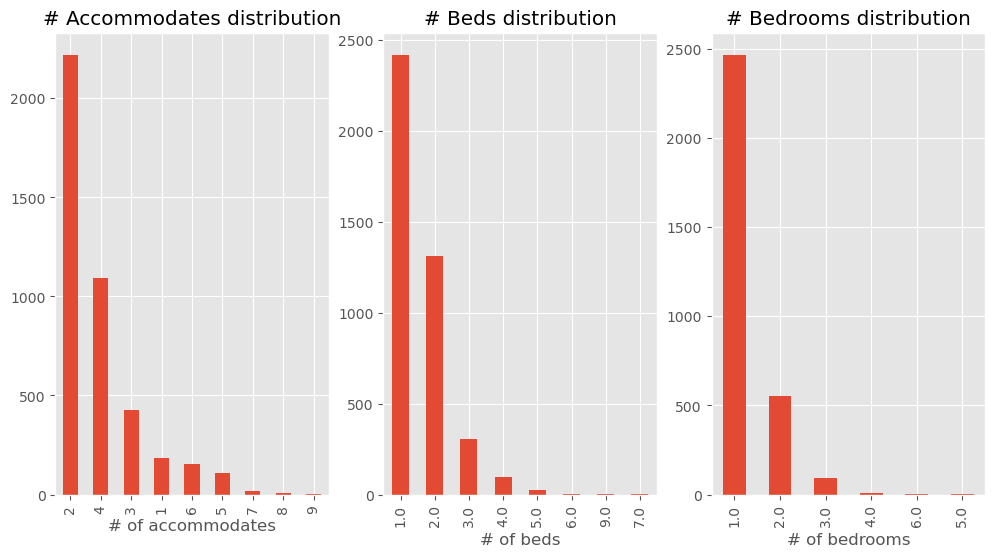

In [33]:
# Calculating number of accommodates
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
best_arrondissements_listings_df['accommodates'].value_counts().plot.bar(ax=axes[0])
best_arrondissements_listings_df['beds'].value_counts().plot.bar(ax=axes[1])
best_arrondissements_listings_df['bedrooms'].value_counts().plot.bar(ax=axes[2])
axes[0].set_title("# Accommodates distribution")
axes[0].set_xlabel("# of accommodates")
axes[1].set_title("# Beds distribution")
axes[1].set_xlabel("# of beds")
axes[2].set_title("# Bedrooms distribution")
axes[2].set_xlabel("# of bedrooms")
plt.show()

Paris is known as one of the most romantic cities on earth, most couples travel there for engagements or honeymoons. It is expected that the majority of listings have 1 bedroom, 1 bed for a maximum of 2 guests. We highly reccomend this same setup for investors, as it has the potential to attract a significant portion of users seeking the perfect romantic getaway

# 5. Conclusions

After conducting a comprehensive analysis, we've uncovered several valuable insights for potential Airbnb investors in Paris. Here's a summary of our findings:

1. **Low Competition:** The 1st and 7th arrondissement present the lowest concentration of Airbnb listings, meaning less competitors for a new properties. 
2. **Best Locations:** The 1st, 4th and 7th arrondissement have the best ratings based on its location, due to their proximity to the heart of Paris and major tourist places. 
3. **Pricing Strategy:** Listings closer to city center tend to have higher prices. Setting a price between \\$100 and \\$300 per night is a competitive choise for the sector.
4. **Essential Amenities:** It is expected for an AirBnb listing in Paris to have a Kitchen, Wifi, Hair Dryer and an Iron.
5. **Couples-Friendly:** Most listings in Paris are apartments with 1 bed for 2 acommodates. Meaning that couples are one of the most frequent type of tourists

IN conclusion, for those considering an Airbnb investment in Paris, we recommend an appartment located in the 1st, 7st or 4th arrondissement, with a single bedroom with 1 bed, designed for couples. Pricing should be adjusted between \\$100 and \\$300 per night, depending on its closeness to major tourist places. Additionally, ensure the property offers essentials amenities such as a Kitchen, WiFi, hair dryer and Iron. This strategic combination is perfect to attract guests searching for a memorable stay in the City of Love.


A complete report can be found on the presentation in this repository